# Convert Python Script to Jupyter Notebook
This notebook demonstrates how to convert a Python script for reading an Excel file into a Jupyter notebook. It outlines the steps, verifies code cells, and tests the notebook output.

## Verify Code Cells
Each code block from the original script is placed in its own cell below. You can run each cell independently to verify its output.

In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read the CSV file and display the first few rows
csv_path = "GH_selection_revise_FIXED.csv"
try:
    df = pd.read_csv(csv_path)
    print("CSV file loaded successfully.")
    display(df.head())
except Exception as e:
    print(f"Error reading the CSV file: {e}")

CSV file loaded successfully.


,name,isFork,commits,branches,defaultBranch,releases,contributors,license,watchers,stargazers,...,openPullRequests,lastCommit,lastCommitSHA,hasWiki,isArchived,stars_region,forks_region,watchers_region,bugfix,improvingcode
0,raykrueger/hibernate-memcached,False,142,5,master,0,5.0,Apache License 2.0,26,111,...,3,2015-03-24T01:05:50,638dd68a70a7d11b14a8c98254db8cbe1b146ed9,True,True,2,2,2,0,0
1,mhroth/jvsthost,False,160,2,master,0,3.0,GNU Lesser General Public License v3.0,15,73,...,1,2012-06-14T08:02:18,0944bf84db9cc5bdac32c2ee4b6de8a43d8e6a0a,True,False,2,2,2,0,0
2,junit-team/junit4,False,2506,5,main,13,146.0,Eclipse Public License 1.0,593,8408,...,19,2023-02-07T03:44:22,e50487c97a8ae9a3168df89751457ba4cfab4d2a,True,False,3,3,3,0,0
3,yui/yuicompressor,False,513,2,master,42,42.0,Other,188,2917,...,21,2019-05-22T12:01:00,cf0497e53fffe4ddbd50e71518c40e0c07d120de,False,False,3,3,3,0,0
4,unclebob/fitnesse,False,6017,4,master,6,110.0,Other,155,1884,...,7,2023-01-30T03:38:59,d45dff8ebc30f0c0f883d6bcfdcf9ac2ef8b5bd1,True,False,3,3,3,0,0


# Basic Stats

In [ ]:
# Basic statistics for 'bugfix' and 'improvingcode' columns
bugfix_stats = df['bugfix'].describe()
improvingcode_stats = df['improvingcode'].describe()

print("Bugfix Statistics:")
print(bugfix_stats)
print("\nImproving Code Statistics:")
print(improvingcode_stats)

Bugfix Statistics:
count    10673.000000
mean         0.005341
std          0.138494
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         12.000000
Name: bugfix, dtype: float64

Improving Code Statistics:
count    10673.000000
mean         0.031294
std          0.327058
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: improvingcode, dtype: float64


### Calculate the number of "Bug Fix" and "Improving Code" Recommendations Per GH Group

In [ ]:
grouped_df = df.groupby(['stars_region', 'forks_region', 'watchers_region'])
group_sums = grouped_df[['bugfix', 'improvingcode']].sum()
print(group_sums)

                                           bugfix  improvingcode
stars_region forks_region watchers_region                       
1            1            1                     5             39
2            2            2                    15            122
3            3            3                    37            173


### Count the number of projects in each group

In [ ]:
group_counts = grouped_df.size()
print(group_counts)

stars_region  forks_region  watchers_region
1             1             1                  2103
2             2             2                  5073
3             3             3                  3497
dtype: int64


# Plot a Graph

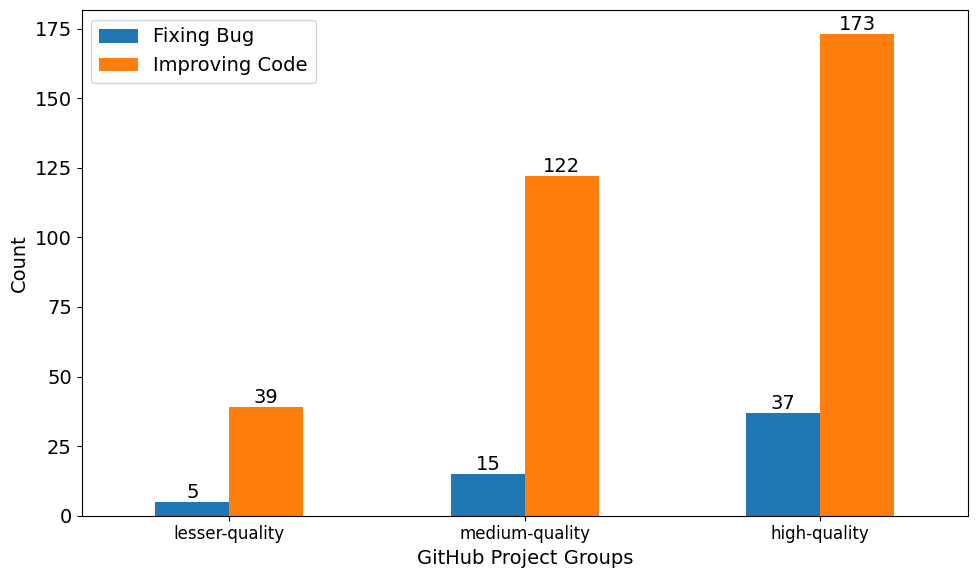

In [ ]:
# Set default font size
plt.rcParams.update({'font.size': 14})
# Plot a bar chart for bugfix and improvingcode sums per group
ax = group_sums.plot(kind='bar', figsize=(10, 6))
ax.set_ylabel('Count', fontsize=14)
ax.set_xlabel('GitHub Project Groups', fontsize=14)
# ax.set_title('Number of Code Recommendations Per GitHub Group', fontsize=14)
ax.set_xticklabels(['Low-popularity', 'Medium-popularity', 'High-popularity'], rotation=0, fontsize=12)
# Update legend labels
ax.legend(['Fixing Bug', 'Improving Code'], fontsize=14)
# Show numbers on bars
for p in ax.patches:
    ax.annotate(
        str(int(p.get_height())),              # value label
        (p.get_x() + p.get_width() / 2, p.get_height()),  # position
        ha='center', va='bottom', fontsize=14
    )
plt.yticks(fontsize=14)

plt.tight_layout()
# Save as PDF
plt.savefig("github_groups_chart.pdf", format="pdf")
plt.show()